In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load the dataset
df = pd.read_csv("outputs/cleaned_olist_data.csv")
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

Revenue Trend Over Time

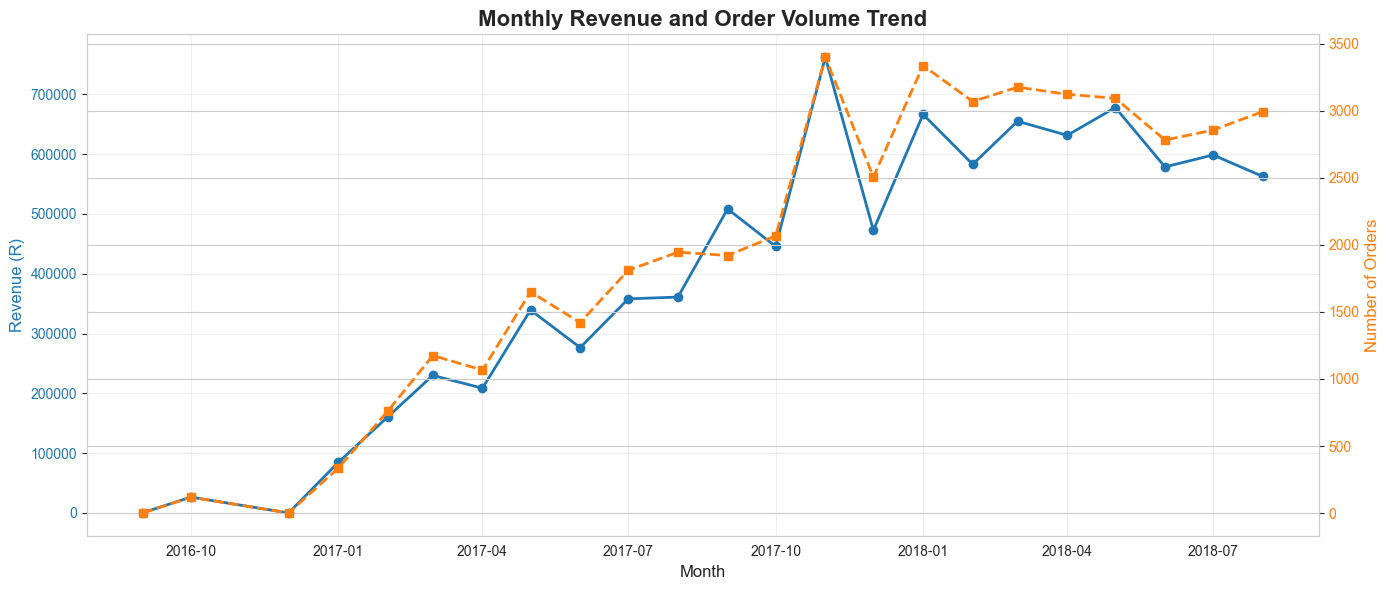

In [8]:
df.columns
monthly_revenue = df.groupby(df["order_purchase_timestamp"].dt.to_period("M")).agg({'payment_value': 'sum',"order_id":"nunique"}).reset_index()
monthly_revenue['order_purchase_timestamp'] = monthly_revenue['order_purchase_timestamp'].dt.to_timestamp()


fig , ax1 = plt.subplots(figsize=(14,6))
color = 'tab:blue'
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue (R)', color=color, fontsize=12)
ax1.plot(monthly_revenue['order_purchase_timestamp'], 
         monthly_revenue['payment_value'], 
         color=color, linewidth=2, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Second y-axis for order count
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Orders', color=color, fontsize=12)
ax2.plot(monthly_revenue['order_purchase_timestamp'], 
         monthly_revenue['order_id'], 
         color=color, linewidth=2, marker='s', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Revenue and Order Volume Trend', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/visualizations/01_revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()

Top 10 Categories by Revenue

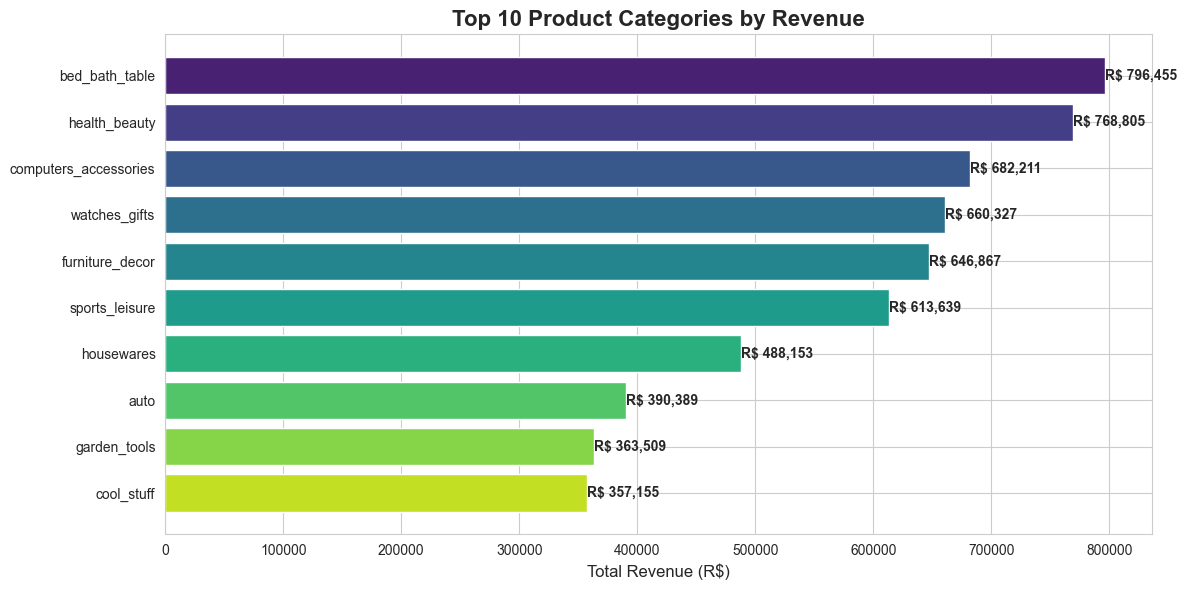

In [18]:
# Category analysis
category_analysis = df.groupby('product_category_name_english').agg({
    'payment_value': 'sum',
    'order_id': 'nunique',
    'review_score': 'mean'
}).round(2).sort_values('payment_value', ascending=False).head(10)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(category_analysis.index, category_analysis['payment_value'], 
               color=sns.color_palette("viridis", 10))

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'R$ {width:,.0f}', 
            ha='left', va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Total Revenue (R$)', fontsize=12)
ax.set_title('Top 10 Product Categories by Revenue', fontsize=16, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('outputs/visualizations/02_top_categories.png', dpi=300, bbox_inches='tight')
plt.show()


 Delivery Performance Heatmap

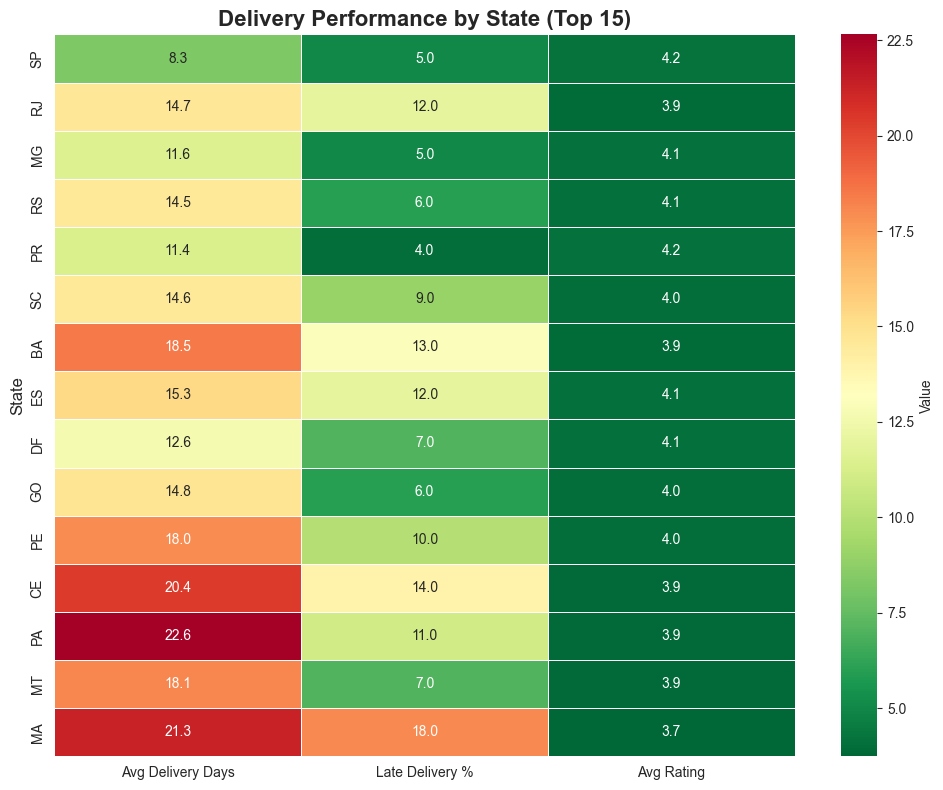

In [23]:
df.columns
delivery_by_state = df.groupby('customer_state').agg({
    "delivery_time": 'mean',
    "is_late": 'mean',
    'order_id': 'nunique',
    'review_score': 'mean'}).round(2)

delivery_by_state.columns = ['Avg Delivery Days', 'Late Delivery %', 'Order Count', 'Avg Rating']
delivery_by_state['Late Delivery %'] = delivery_by_state['Late Delivery %'] * 100

top_states = delivery_by_state.nlargest(15, 'Order Count')

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(top_states[['Avg Delivery Days', 'Late Delivery %', 'Avg Rating']], 
            annot=True, fmt='.1f', cmap='RdYlGn_r', 
            linewidths=0.5, cbar_kws={'label': 'Value'})
plt.title('Delivery Performance by State (Top 15)', fontsize=16, fontweight='bold')
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/visualizations/03_delivery_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Customer Review Distribution

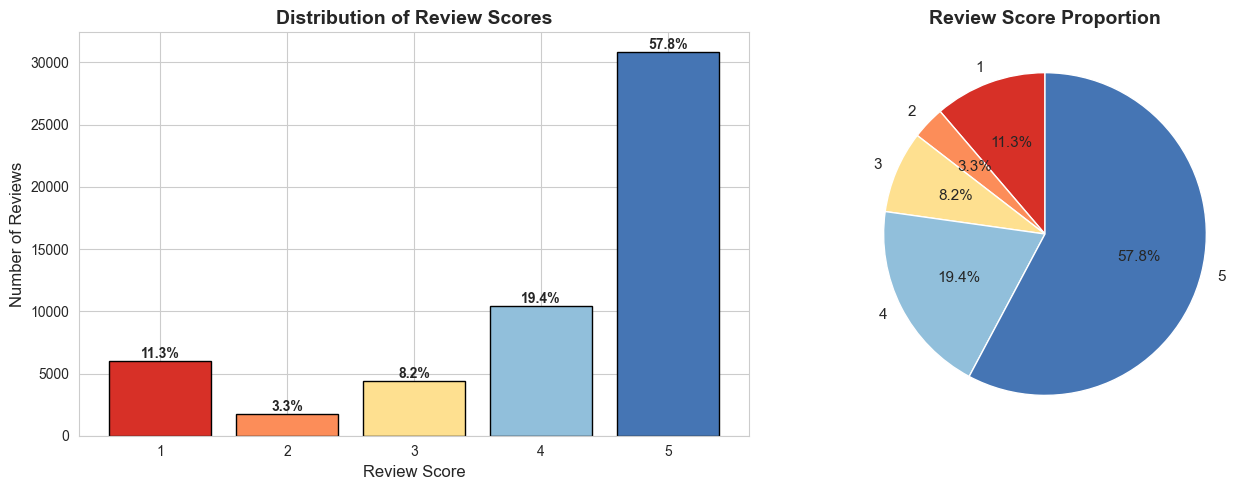

In [28]:
# Review distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
review_dist = df['review_score'].value_counts().sort_index()
colors = ['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4']
ax1.bar(review_dist.index, review_dist.values, color=colors, edgecolor='black')
ax1.set_xlabel('Review Score', fontsize=12)
ax1.set_ylabel('Number of Reviews', fontsize=12)
ax1.set_title('Distribution of Review Scores', fontsize=14, fontweight='bold')
ax1.set_xticks([1, 2, 3, 4, 5])

# Add percentage labels
total_reviews = review_dist.sum()
for i, v in enumerate(review_dist.values):
    pct = (v / total_reviews) * 100
    ax1.text(review_dist.index[i], v, f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Pie chart
ax2.pie(review_dist.values, labels=review_dist.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11})
ax2.set_title('Review Score Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/visualizations/04_review_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



 Correlation Heatmap

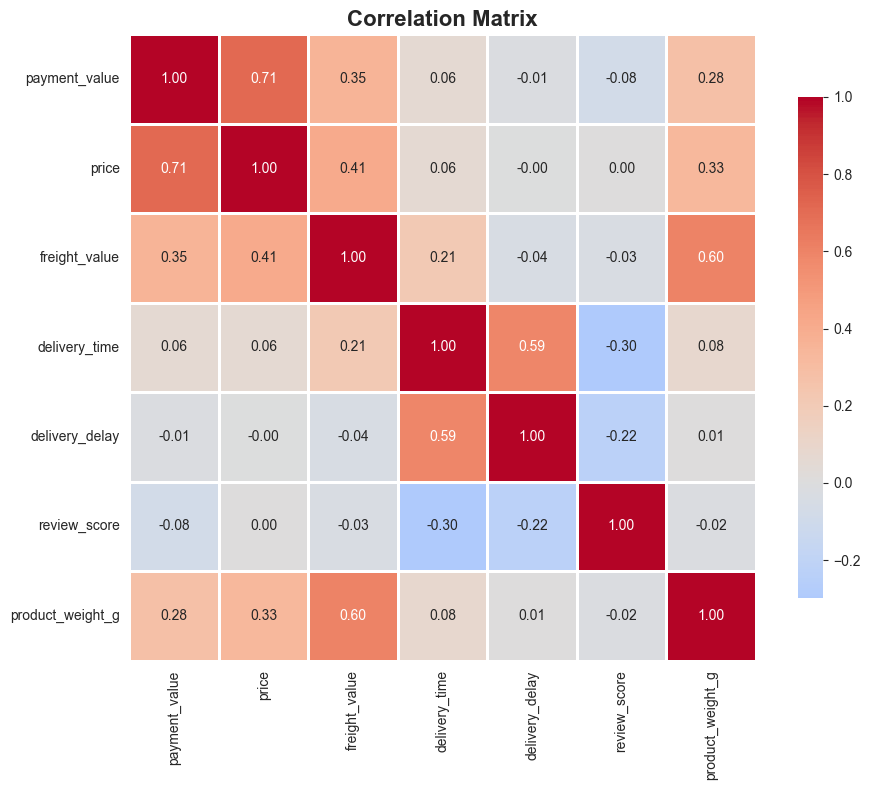

In [30]:
cor_col =['payment_value',
    'price',
    'freight_value',
    'delivery_time',
    'delivery_delay',
    'review_score',
    'product_weight_g']
cor_data = df[cor_col].corr()

fig , ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor_data,annot=True,fmt=".2f",cmap="coolwarm",center=0,square=True,linewidths=1,cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/visualizations/05_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
category_profit = df.groupby('product_category_name_english').agg({
    'price': 'sum',
    'freight_value': 'sum'
})
category_profit['profit_margin'] = category_profit['price'] - category_profit['freight_value']
category_profit = category_profit.sort_values('profit_margin', ascending=False).head(10)
category_profit


,price,freight_value,profit_margin
product_category_name_english,,,
watches_gifts,570904.32,48664.23,522240.09
health_beauty,603260.05,87456.32,515803.73
bed_bath_table,507375.39,99178.53,408196.86
sports_leisure,456134.28,78749.58,377384.70
computers_accessories,419393.36,67605.66,351787.70
furniture_decor,346541.23,81048.77,265492.46
cool_stuff,301811.44,39633.09,262178.35
auto,297138.32,44906.81,252231.51
housewares,307565.82,69973.50,237592.32


C:\Users\Hp\AppData\Local\Temp\ipykernel_24356\3187700709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rateing_by_delivery_time =df.groupby("delivery_time").agg({


<Axes: xlabel='delivery_time', ylabel='review_score'>

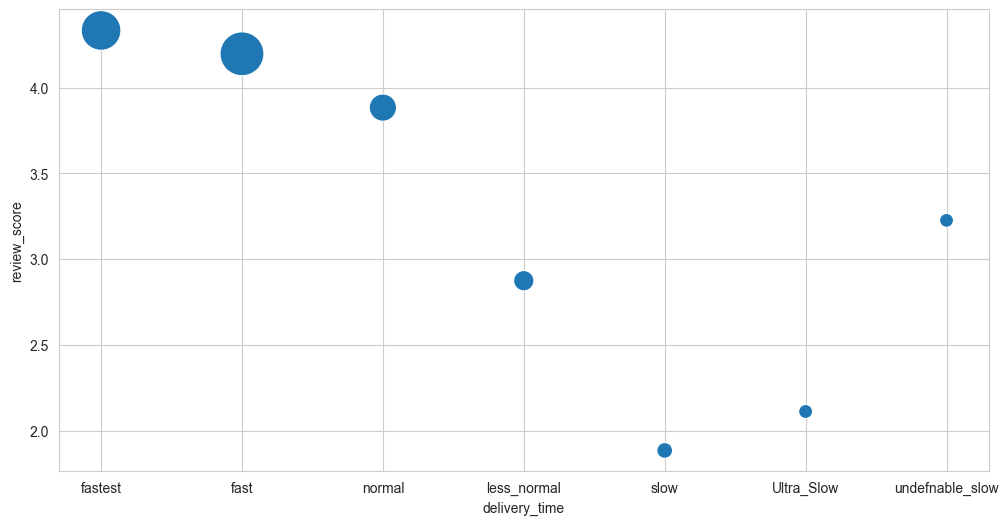

In [22]:
df["delivery_time"] = pd.cut(df["delivery_time"], bins=[0,7,16,25,40,70,120,np.inf], labels=["fastest","fast","normal","less_normal","slow","Ultra_Slow","undefnable_slow"])
rateing_by_delivery_time =df.groupby("delivery_time").agg({
    "order_id":"nunique",
    "review_score":"mean"
})
sns.scatterplot(data=rateing_by_delivery_time, x=rateing_by_delivery_time.index, y="review_score", size="order_id", legend=False, sizes=(100, 1000))

Overall Delivery Metrics

In [50]:
# Average delivery time

avg_delivery_time = df["delivery_time"].mean()
# Median delivery time
median_delivery_time = df["delivery_time"].median()
# % of late deliveries
# % of very late deliveries 
late_threshold = 12
very_late_threshold = 20
# Calculate the count of late deliveries (True values sum as 1)
late_count = (df['delivery_time'] > late_threshold).sum()
very_late_count = (df['delivery_time'] > very_late_threshold).sum()

# Calculate the total number of deliveries
total_count = len(df)

# Calculate the percentage of late deliveries
percentage_late = (late_count / total_count) * 100
percentage_very_late = (very_late_count/total_count) * 100
print(f"Average Delivery Time: {avg_delivery_time:.2f} days")
print(f"Median Delivery Time: {median_delivery_time:.2f} days")
print(f"Percentage of Late Deliveries (> {late_threshold} days): {percentage_late:.2f}%")
print(f"Percentage of Very Late Deliveries (> {very_late_threshold} days): {percentage_very_late:.2f}%")


Average Delivery Time: 12.02 days
Median Delivery Time: 10.00 days
Percentage of Late Deliveries (> 12 days): 35.52%
Percentage of Very Late Deliveries (> 20 days): 12.87%


DELIVERY TiME DISTRIBUTION

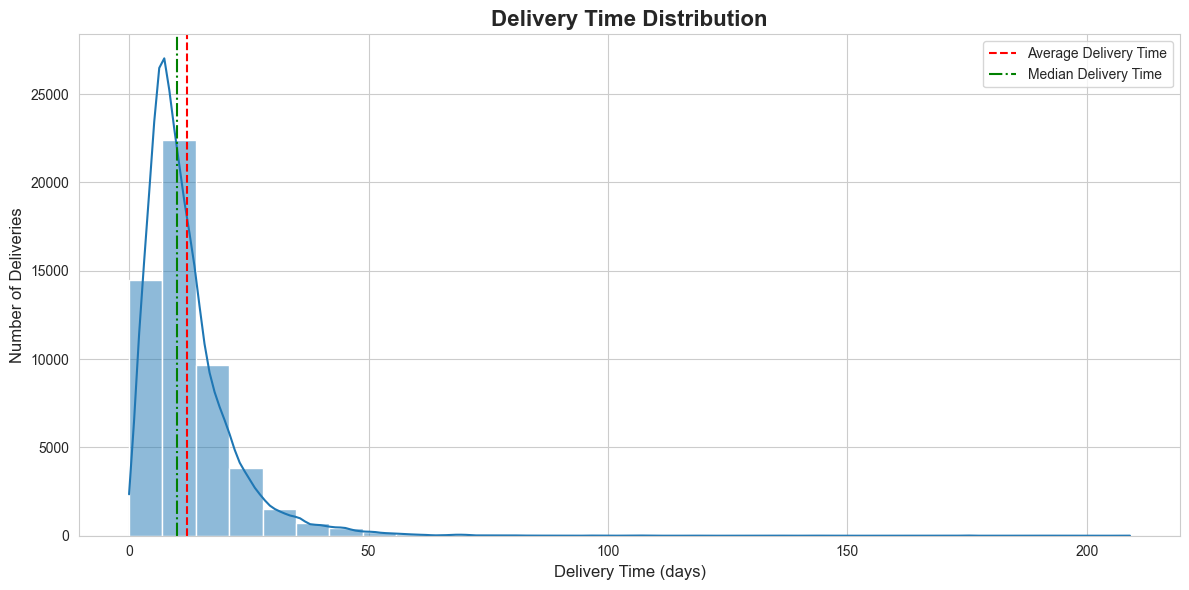

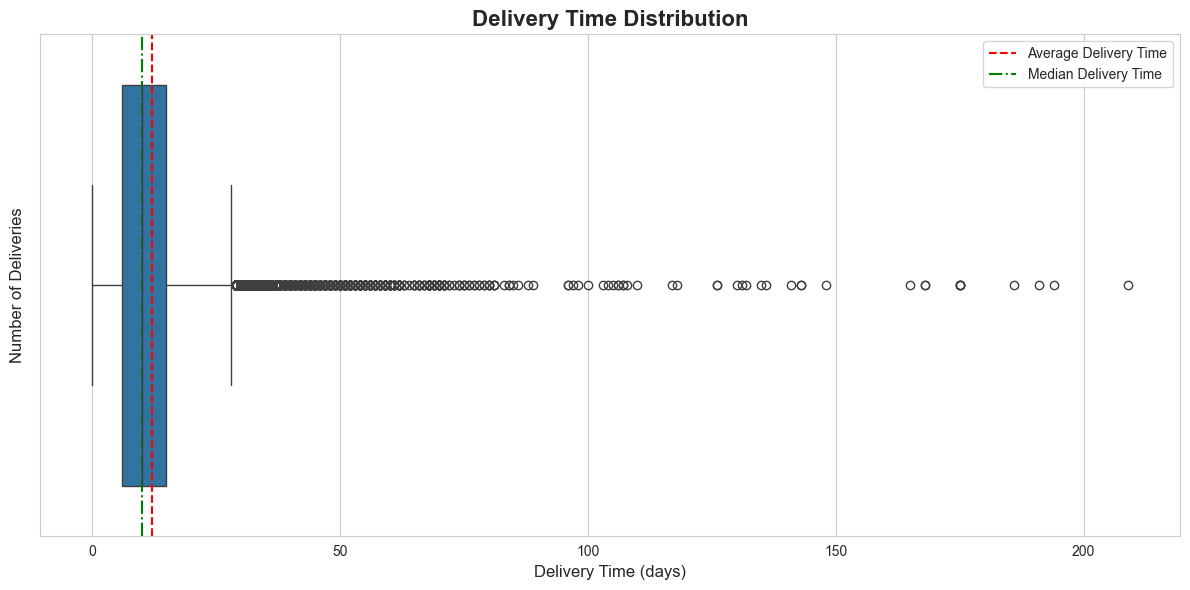

In [ ]:
# histogram of delivery times

sns.histplot(data=df, x="delivery_time", bins=30, kde=True)
plt.axvline(avg_delivery_time, color='r', linestyle='--', label='Average Delivery Time')
plt.axvline(median_delivery_time, color='g', linestyle='-.', label='Median Delivery Time')
plt.title('Delivery Time Distribution', fontsize=16, fontweight='bold')         
plt.xlabel('Delivery Time (days)', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.legend()
plt.tight_layout()
# plt.savefig('outputs/visualizations/06_delivery_time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify if there are outliers
sns.boxplot(data=df, x="delivery_time")
plt.axvline(avg_delivery_time, color='r', linestyle='--', label='Average Delivery Time')
plt.axvline(median_delivery_time, color='g', linestyle='-.', label='Median Delivery Time')
plt.title('Delivery Time Distribution', fontsize=16, fontweight='bold') 
plt.xlabel('Delivery Time (days)', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.legend()
plt.tight_layout()
# plt.savefig('outputs/visualizations/06_delivery_time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Late Delivery Analysis

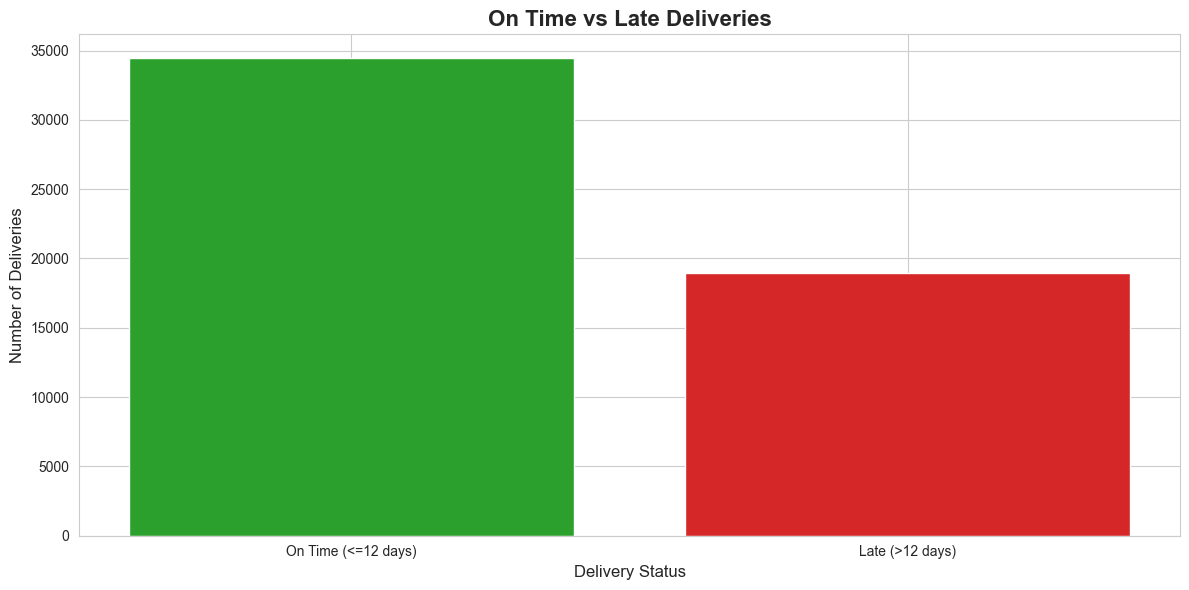

Average delivery time for late deliveries: 20.958482613277134


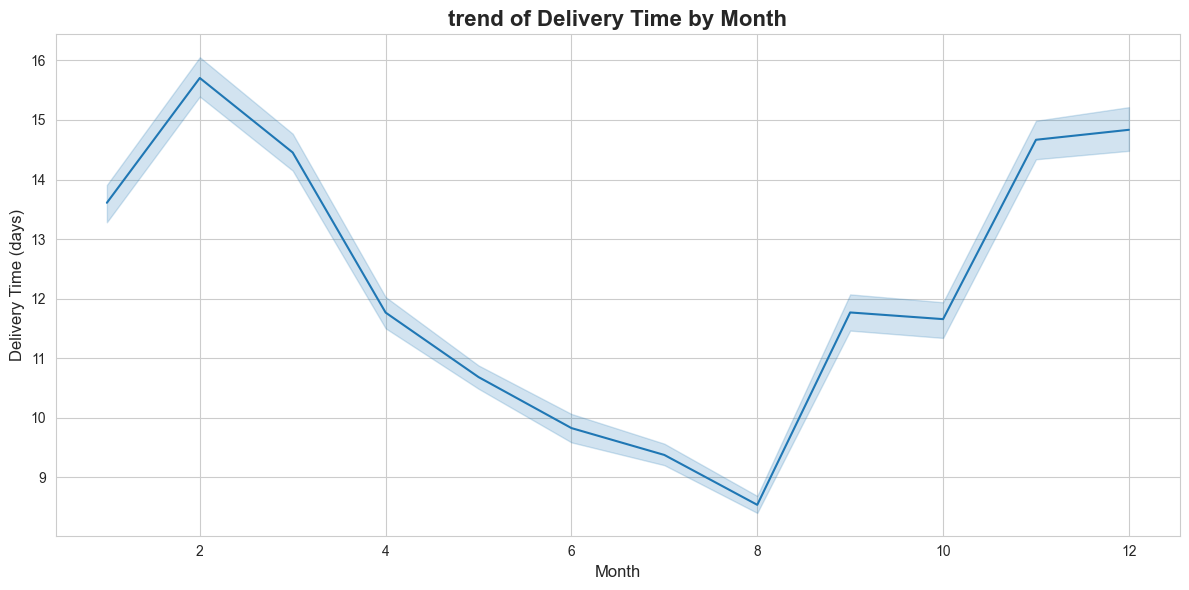

In [ ]:
# Compare on-time vs late deliveries

on_time = df[df["delivery_time"] <= 12]
late_deliveries = df[df["delivery_time"] > 12]
plt.bar(['On Time (<=12 days)', 'Late (>12 days)'], [len(on_time), len(late_deliveries)], color=['#2ca02c', '#d62728'])
plt.title('On Time vs Late Deliveries', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/07_on_time_vs_late_deliveries.png', dpi=300, bbox_inches='tight')
plt.show()

# How late are the late deliveries? (average delay)

print("Average delivery time for late deliveries:", late_deliveries["delivery_time"].mean())

# Trend: Are late deliveries increasing or decreasing over time?

month = df["order_purchase_timestamp"].dt.month               
sns.lineplot(data=df, x=month, y="delivery_time")
plt.title('trend of Delivery Time by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delivery Time (days)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/08_delivery_time_trend.png', dpi=300, bbox_inches='tight')
plt.show()

GEOGRAPHICAL ANALYSIS

C:\Users\Hp\AppData\Local\Temp\ipykernel_9864\930580755.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="customer_state", y="is_late", ci=None, order=df.groupby('customer_state')['delivery_time'].mean().sort_values(ascending=False).head(10).index)


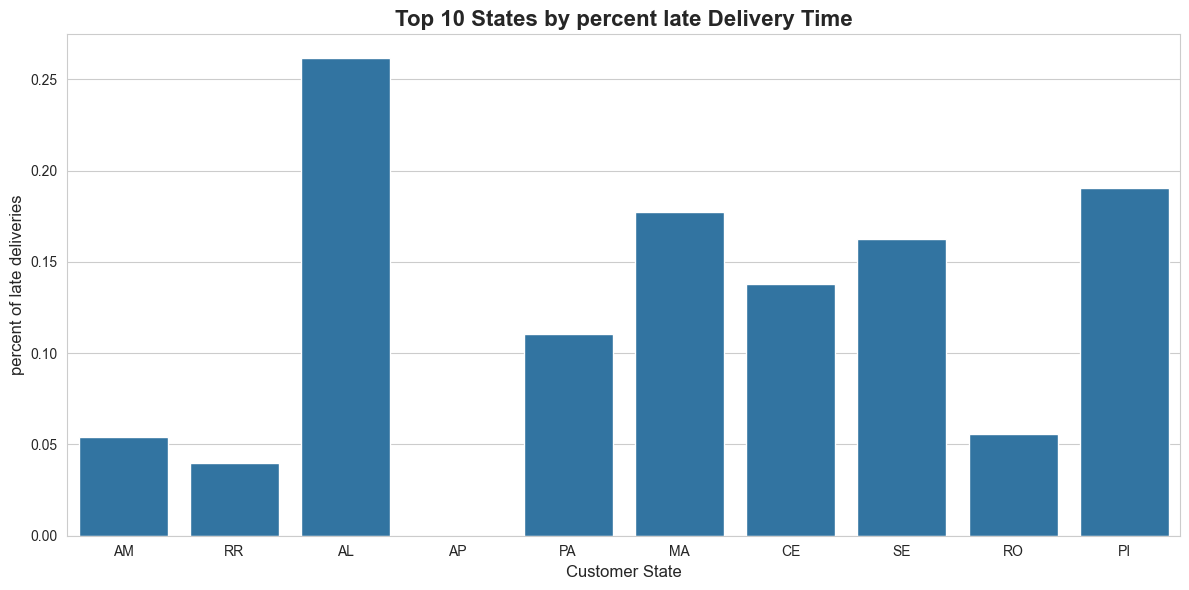

In [51]:
# Which states have the worst delivery times?
# State-level analysis
state_delivery = df.groupby('customer_state').agg({
    'delivery_time': 'mean',
    'is_late': 'mean',
    'order_id': 'count'
})

state_by_late_Delivery = state_delivery.sort_values('is_late', ascending=False).head(10)
state_by_late_Delivery
sns.barplot(data=df, x="customer_state", y="is_late", ci=None, order=df.groupby('customer_state')['delivery_time'].mean().sort_values(ascending=False).head(10).index)
plt.title('Top 10 States by percent late Delivery Time', fontsize=16, fontweight='bold')
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('percent of late deliveries', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/10_top_states_by_delivery_time.png', dpi=300, bbox_inches='tight')
plt.show()


Impact on Customer Satisfaction

Average Review Score (On-time vs Late):
is_late
0    4.217840
1    2.481003
Name: review_score, dtype: float64

Correlation between delay days and review score: -0.2221


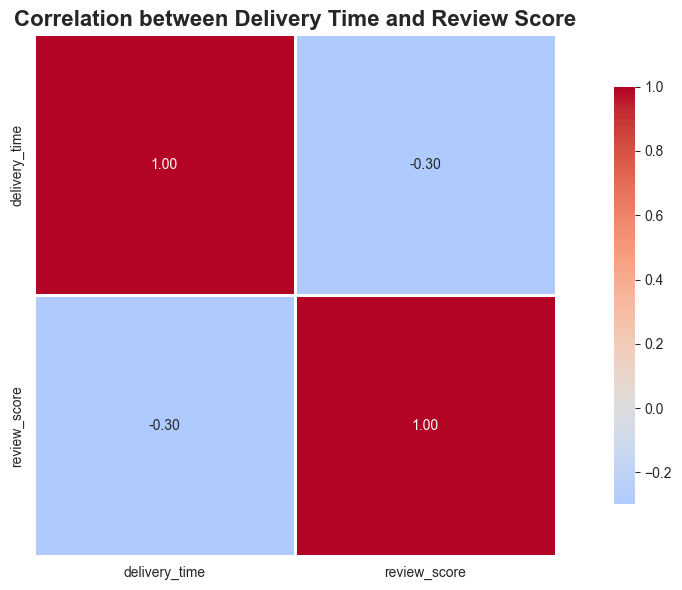

In [ ]:
# Do late deliveries cause bad reviews? (correlation analysis)
# Create a comparison: avg review score for on-time vs late deliveries
col = ["delivery_time","review_score"]

comparison = df.groupby('is_late')['review_score'].mean()
print("Average Review Score (On-time vs Late):")
print(comparison)

# Calculate Correlation
correlation = df[['delivery_delay', 'review_score']].corr().iloc[0, 1]
print(f"\nCorrelation between delay days and review score: {correlation:.4f}")

# Visualize the relationship

sns.heatmap(df[col].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation between Delivery Time and Review Score', fontsize=16, fontweight='bold')
plt.tight_layout()
# plt.savefig('outputs/visualizations/11_delivery_time_review_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

Seasonal/Temporal Patterns

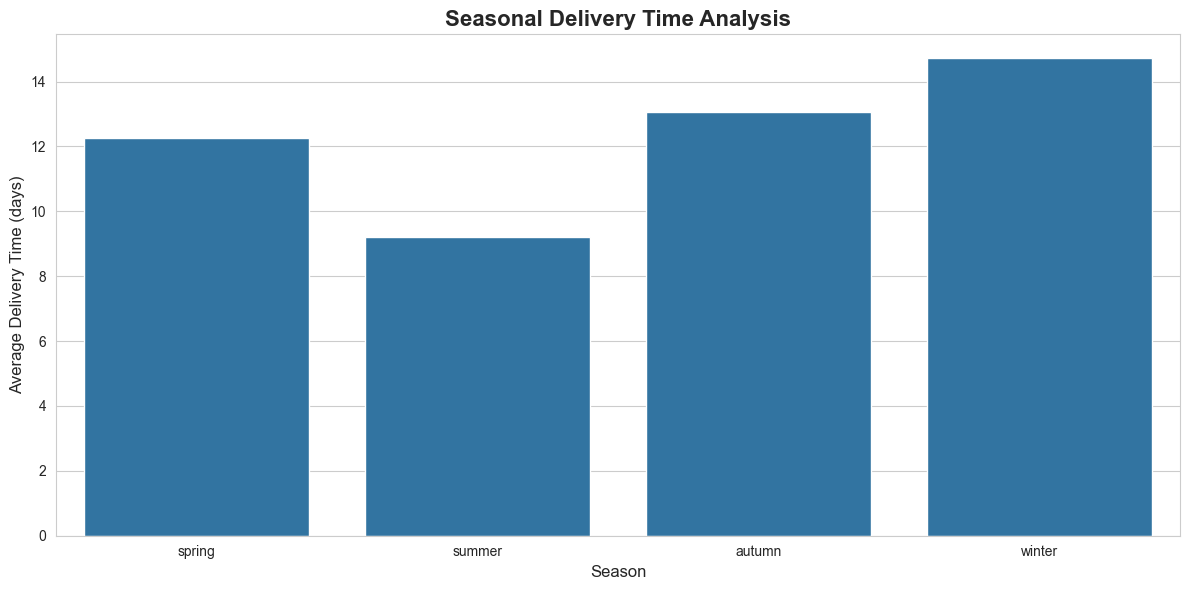

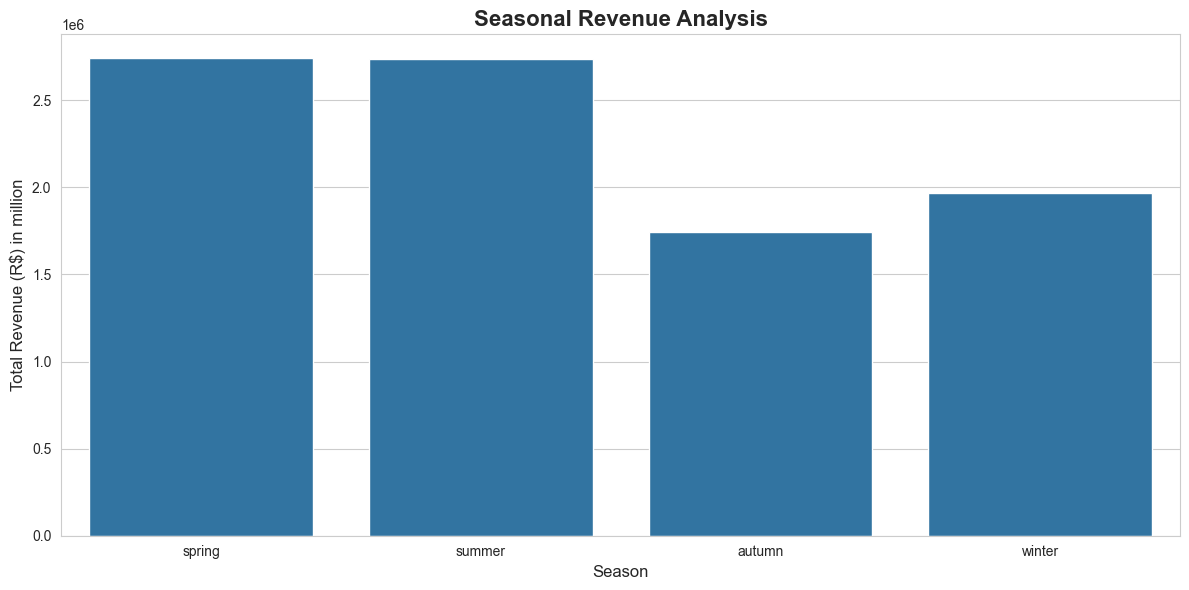

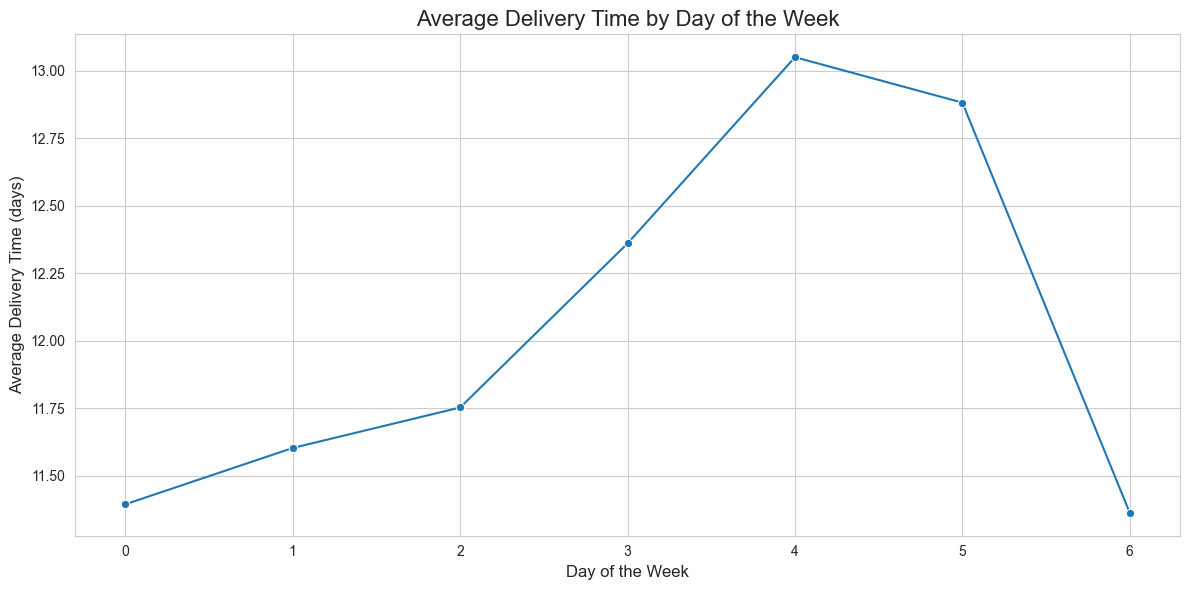

In [56]:
season_map = {
    12: 'winter', 1: 'winter', 2: 'winter',
    3: 'spring', 4: 'spring', 5: 'spring',
    6: 'summer', 7: 'summer', 8: 'summer',
    9: 'autumn', 10: 'autumn', 11: 'autumn'
}

df["season"] = df["order_purchase_timestamp"].dt.month.map(season_map)
seasonal_analyse = df.groupby("season").agg({
    "order_id":"nunique",
    "payment_value":"sum",
    "review_score":"mean",
    "delivery_time":"mean"
}).round(2)


# Do delivery times vary by season
sns.barplot(data=seasonal_analyse.reset_index(), x="season", y="delivery_time", order=["spring","summer","autumn","winter"])
plt.title('Seasonal Delivery Time Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Delivery Time (days)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/12_seasonal_delivery_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



# do revenue vary by season
sns.barplot(data=seasonal_analyse.reset_index(), x="season", y="payment_value", order=["spring","summer","autumn","winter"])
plt.title('Seasonal Revenue Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Revenue (R$) in million', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/12_seasonal_revenue_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#  Do orders placed on Monday deliver faster than Friday?
monthly_changes = df.groupby("day_of_week").agg({
    "payment_value":"sum",
    "order_id":"nunique",
    "review_score":"mean",
    "delivery_time":"mean"
})

# Are there specific months with worse performance?
# Day of week analysis: Do orders placed on Monday deliver faster than Friday?
sns.lineplot(data=monthly_changes.reset_index(), x="day_of_week", y="delivery_time", marker='o')
plt.title('Average Delivery Time by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delivery Time (days)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/13_delivery_time_by_day_of_week.png', dpi=300, bbox_inches='tight')
plt.show()




Freight Cost Analysis

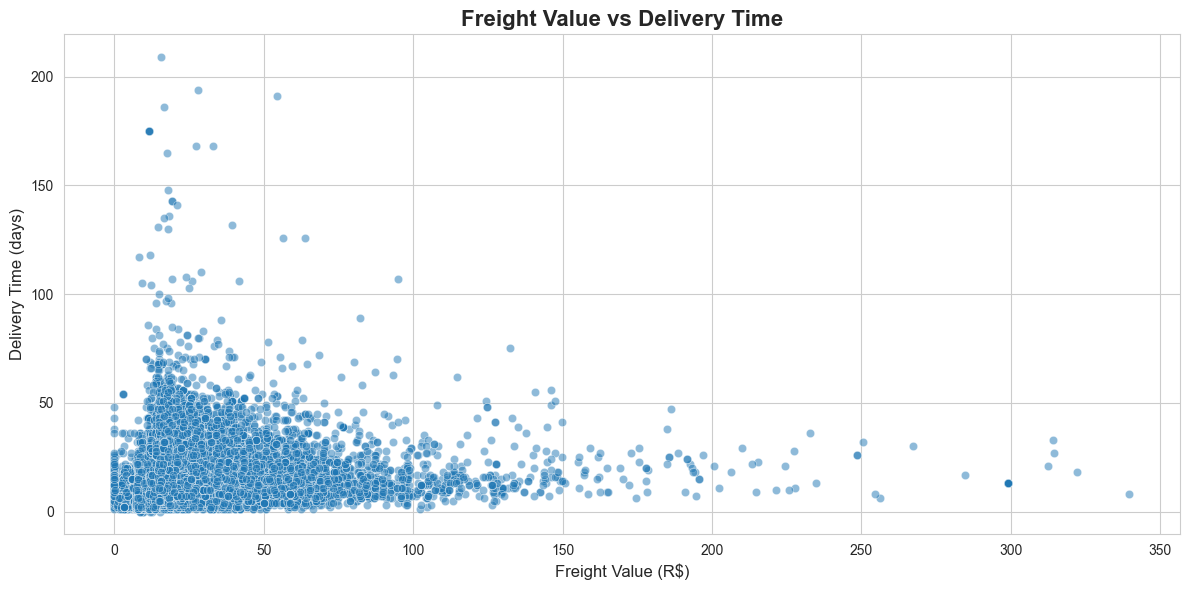

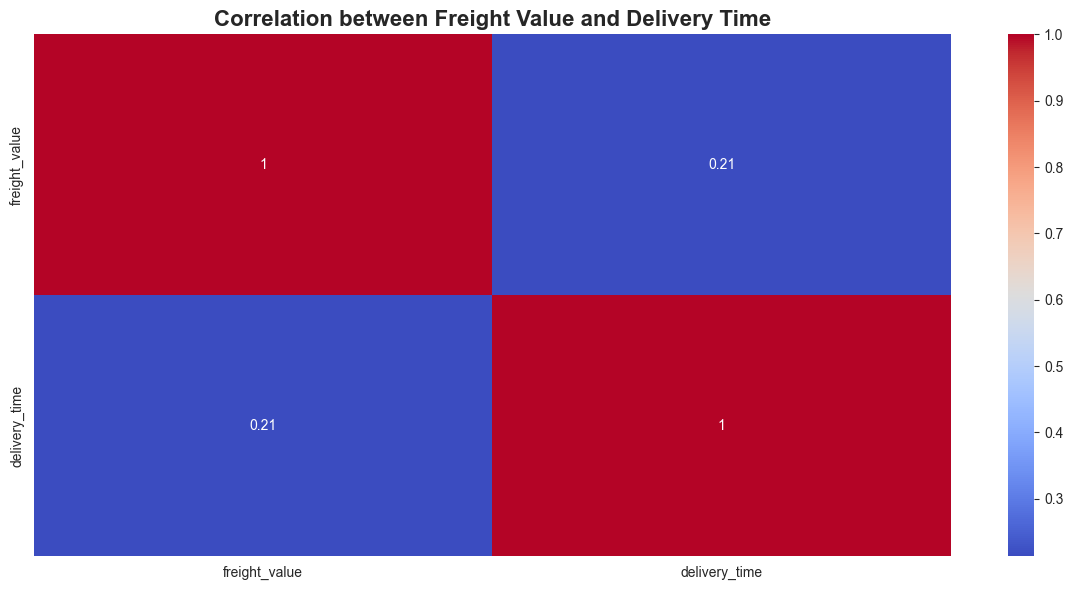

In [57]:
# Do customers paying higher freight get faster delivery

df.groupby('freight_value').agg({
    'delivery_time': 'mean',
    'is_late': 'mean',
    'order_id': 'nunique',
    "payment_value": 'mean'
})
sns.scatterplot(data=df, x="freight_value", y="delivery_time", alpha=0.5)
plt.title('Freight Value vs Delivery Time', fontsize=16, fontweight='bold')
plt.xlabel('Freight Value (R$)', fontsize=12)
plt.ylabel('Delivery Time (days)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/14_freight_value_vs_delivery_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Is there a relationship between freight cost and delivery performance
sns.heatmap(df[["freight_value","delivery_time"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Freight Value and Delivery Time', fontsize=16, fontweight='bold')
plt.tight_layout()
# plt.savefig('outputs/visualizations/15_freight_value_delivery_time_correlation.png', dpi=300, bbox_inches='tight')
plt.show()


<Axes: xlabel='order_purchase_timestamp', ylabel='delivery_before_expect'>

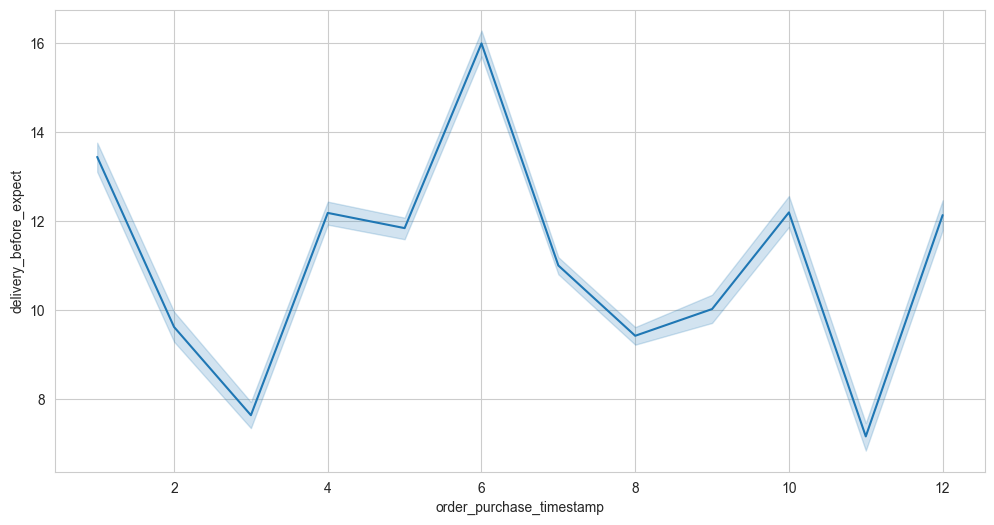

In [76]:
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["delivery_before_expect"] = df["order_estimated_delivery_date"] - df["order_delivered_customer_date"]
sns.lineplot(data=df, x=df["order_purchase_timestamp"].dt.month, y=df["delivery_before_expect"].dt.days)

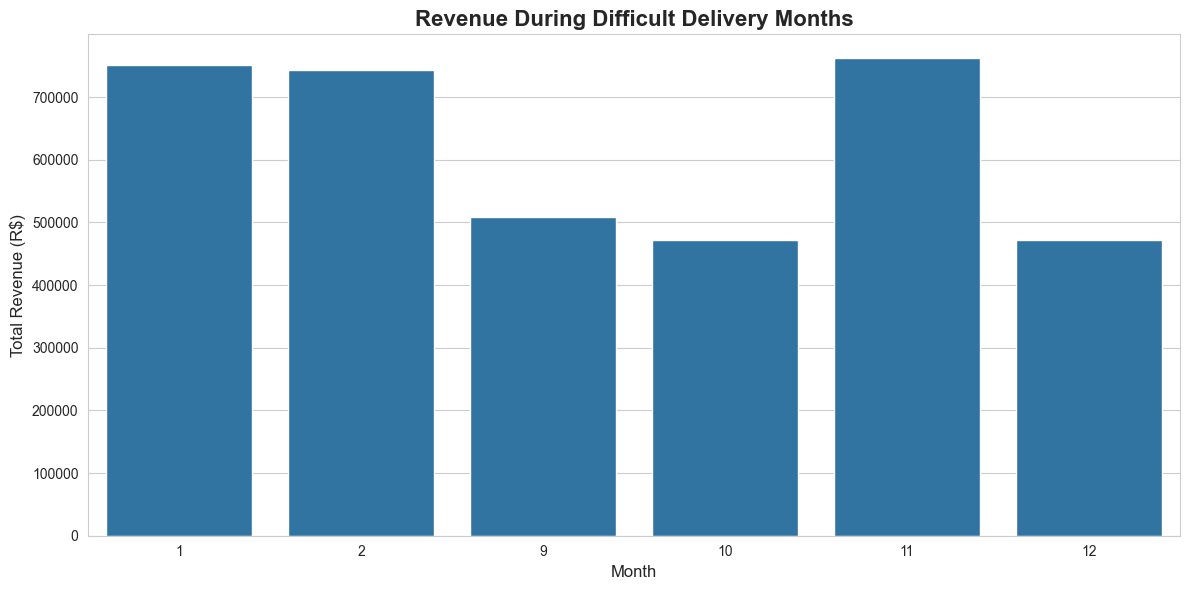

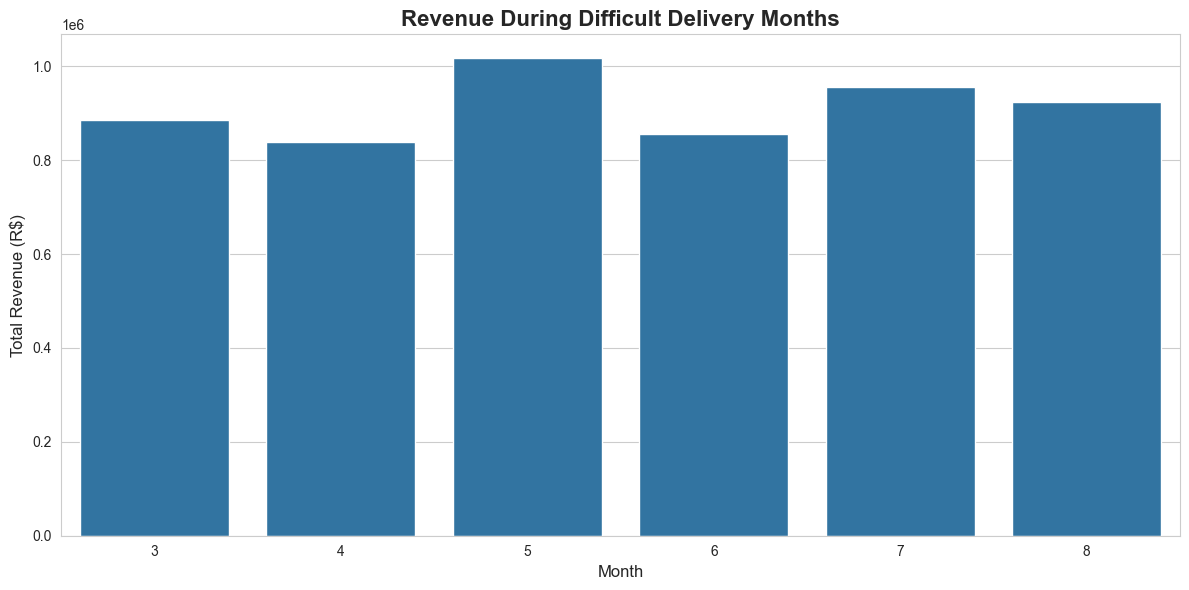

In [91]:
# Filtering for months 9, 10, 11, 12, 1, 2
months_list = [9, 10, 11, 12, 1, 2]
more_time_Delivery_period = df[df["order_purchase_timestamp"].dt.month.isin(months_list)]
difficult_revenue = more_time_Delivery_period.groupby(more_time_Delivery_period["order_purchase_timestamp"].dt.month)["payment_value"].sum()
sns.barplot(x=difficult_revenue.index, y=difficult_revenue.values)
plt.title('Revenue During Difficult Delivery Months', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (R$)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/16_difficult_delivery_months_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

months_list = [3,4,5,6,7,8]
more_time_Delivery_period = df[df["order_purchase_timestamp"].dt.month.isin(months_list)]
difficult_revenue = more_time_Delivery_period.groupby(more_time_Delivery_period["order_purchase_timestamp"].dt.month)["payment_value"].sum()
sns.barplot(x=difficult_revenue.index, y=difficult_revenue.values)
plt.title('Revenue During Difficult Delivery Months', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (R$)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/16_difficult_delivery_months_revenue.png', dpi=300, bbox_inches='tight')
plt.show()



In [79]:
df["month"]

0        10
1        10
2        10
3         7
4         8
         ..
53428     7
53429     4
53430    11
53431     1
53432     2
Name: month, Length: 53433, dtype: int64